In [155]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import sigmoid, linear


#logging
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

### Neuron with Linear activation function (linear regression)

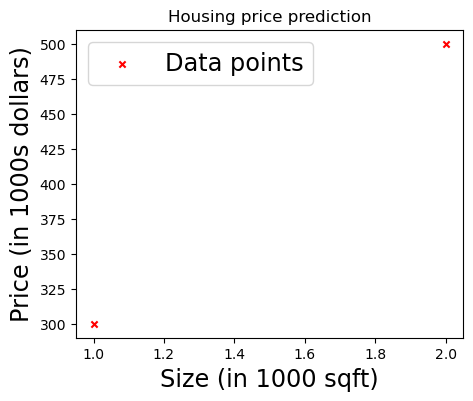

In [55]:
#Linear Regression with single neuron
#input data for housing price prediction
X = np.array([[1.0], [2.0]], dtype=np.float32) #2 examples (rows) , 1 - feature (cols) - size in 1000 sqft
y = np.array([[300.0], [500.0]], dtype=np.float32) #price in 1000s of dollars

#plotting the data
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.scatter(X, y, c="red", s=20, marker="x", label="Data points")
ax.legend(fontsize="xx-large")
ax.set_xlabel("Size (in 1000 sqft)", fontsize="xx-large"); ax.set_ylabel("Price (in 1000s dollars)", fontsize="xx-large")
ax.set_title("Housing price prediction")
plt.show()

In [22]:
#Creating a neural network architecture
linear_layer = Dense(units="1", activation="linear") #hidden layer with just one neuron 

#1 neuron means only 1 w and b that is gonna come from one input feature to the hidden layer in order to create an activation

In [23]:
#get the weights from the model
linear_layer.get_weights()

#There are no weights as the weights are not yet instantiated. 
#Let's try the model on one example in X_train. (may be first example)
#This will trigger the instantiation of the weights.
#Note, the input to the layer must be 2-D, so we'll reshape it.

[]

In [27]:
#sending input to the model
a1 = linear_layer(X[0].reshape(1, 1))
print(a1) #w. x + b = linear activation

#The result is a tensor (another name for an array) with a shape of (1, 1) or one entry.

tf.Tensor([[1.6066118]], shape=(1, 1), dtype=float32)


In [28]:
#Now let's look at the weights and bias.
w, b = linear_layer.get_weights()
print(f"w: {w}, b: {b}")

#These weights are randomly initialized to small numbers and the bias defaults to being initialized to zero.

w: [[1.6066118]], b: [0.]


    A linear regression model with a single input feature will have a single weight and bias.
    This matches the dimensions of our linear_layer above.

    Here the weights are initialized to random values, so let's set them to some known values.

In [33]:
#setting initial weights manually
set_w = np.array([[200]])
set_b = np.array([100])
linear_layer.set_weights([set_w, set_b])
a1 = linear_layer(X[0].reshape(-1, 1)) #w.x + b = linear activation

print(a1)
print(linear_layer.get_weights())

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[array([[200.]], dtype=float32), array([100.], dtype=float32)]


In [34]:
#comparing linear activation nueral network with the usual linear regression model and both should match
a1 = linear_layer(X[0].reshape(-1, 1))
print(a1)
a_usual = np.dot(X[0].reshape(-1, 1), set_w) + set_b
print(a_usual)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


In [35]:
#prediction with  linear layer  and usual np linear regression model
predict_tf = linear_layer(X)
predict_np = np.dot(X, set_w) + set_b
print(predict_tf)
print(predict_np)

tf.Tensor(
[[300.]
 [500.]], shape=(2, 1), dtype=float32)
[[300.]
 [500.]]


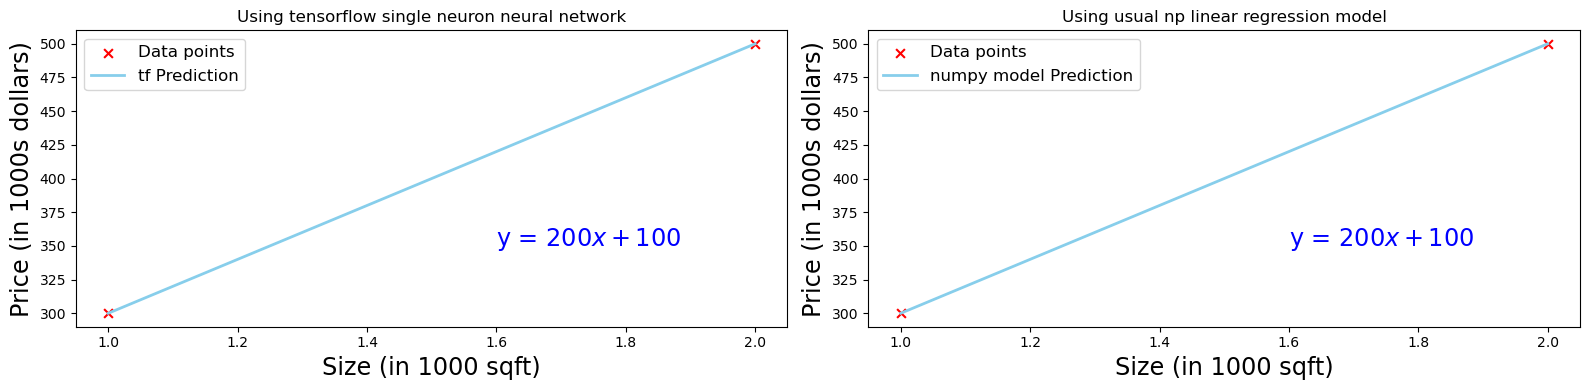

In [53]:
#plotting the models predictions with the actual to see whether the model is fitting or not
def plt_linear(X, y, p_tf, p_np):
    fig, ax = plt.subplots(1, 2, figsize=(16, 4))
    ax[0].scatter(X, y, c="red", s=40, marker="x", label="Data points")
    ax[0].plot(X, p_tf, c="skyblue", label="tf Prediction", lw=2)
    ax[0].legend(fontsize="large")
    ax[0].text(1.6, 350, r"y = $200 x + 100$ ", fontsize="xx-large", color="blue")
    ax[0].set_xlabel("Size (in 1000 sqft)", fontsize="xx-large")
    ax[0].set_ylabel("Price (in 1000s dollars)", fontsize="xx-large")
    ax[0].set_title("Using tensorflow single neuron neural network")
    
    ax[1].scatter(X, y, c="red", s=40, marker="x", label="Data points")
    ax[1].plot(X, p_np, c="skyblue", label="numpy model Prediction", lw=2)
    ax[1].legend(fontsize="large")
    ax[1].text(1.6, 350, r"y = $200 x + 100$", fontsize="xx-large", color="blue")
    ax[1].set_xlabel("Size (in 1000 sqft)", fontsize="xx-large")
    ax[1].set_ylabel("Price (in 1000s dollars)", fontsize="xx-large")
    ax[1].set_title("Using usual np linear regression model")
    plt.tight_layout()
    plt.show()
    
plt_linear(X, y, predict_tf, predict_np)

### Neuron with Sigmoid activation

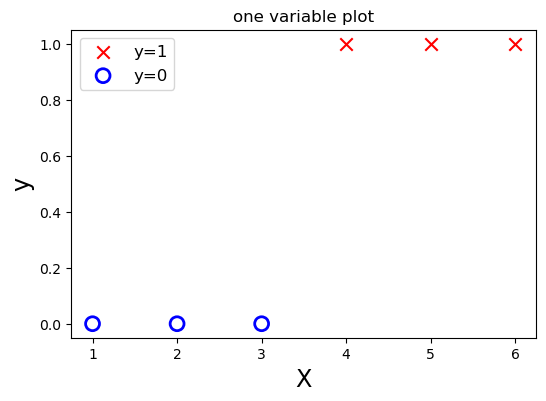

In [78]:
#categorical data
X = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], dtype=np.float32).reshape(-1, 1) #2D matrix
y = np.array([0.0, 0.0, 0.0, 1.0, 1.0, 1.0], dtype=np.float32).reshape(-1, 1)

#plotting
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
pos = y==1
neg = y==0
ax.scatter(X[pos], y[pos], c="red", s=80, marker="x", label="y=1")
ax.scatter(X[neg], y[neg], s=100, lw=2, marker="o", facecolors="none", edgecolors="blue", label="y=0")

ax.legend(fontsize="large")
ax.set_xlabel("X", fontsize="xx-large")
ax.set_ylabel("y", fontsize="xx-large")
ax.set_title("one variable plot")
plt.show()

    We can implement a 'logistic neuron' by adding a sigmoid activation. The function of the neuron is then described by 
                f(x) = sigmoid(w.x + b) = 1 / 1 + e^-(w.x + b)
    
    This section will create a Tensorflow Model that contains our logistic layer to demonstrate an alternate method of creating models. Tensorflow is most often used to create multi-layer models. The Sequential model is a convenient means of constructing these models.

In [66]:
model = Sequential([
    Dense(units=1, input_dim=1, activation="sigmoid", name="l1")
])
model.summary()

#model.summary() shows the layers and number of parameters in the model.
#There is only one layer in this model and that layer has only one unit.
#The unit has two parameters, w and b (depends on previous input layer units that acts as features to the current layer)
# units in previous layers output(activations) are considered as features to the next input layer
# w_shape = number of in neurons * number of out neurons
# b_shape = number of out neurons

#Note: The bias vector b could be represented as a 1-D (n,) or 2-D (n,1) array.
#Tensorflow utilizes a 1-D representation and this lab will maintain that convention.

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
l1 (Dense)                   (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [67]:
#get the layer via 
logistic_layer = model.get_layer("l1")
print(logistic_layer)
w, b = logistic_layer.get_weights()
print(w, b)
print(w.shape, b.shape) #random initial values for w and b

[[-0.590214]] [0.]
(1, 1) (1,)


In [73]:
#let's set the weight and bias to some known values.
set_w = np.array([[2]])
set_b = np.array([-4.5])
logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


In [80]:
#Let's compare actual np sigmoid function to the layer output.
a_layer = model.predict(X[0].reshape(1,1))
print(a_layer)

def sigmoid(z):
    z = np.clip(z, -500, 500 )           # protect against overflow
    return 1 / (1 + np.exp(-z))

a_np = sigmoid(np.dot(X[0].reshape(1, 1), set_w) + set_b)
print(a_np)

#They produce the same values!
#Now, we can use our logistic layer and NumPy model to make predictions on our training data

[[0.07585818]]
[[0.07585818]]


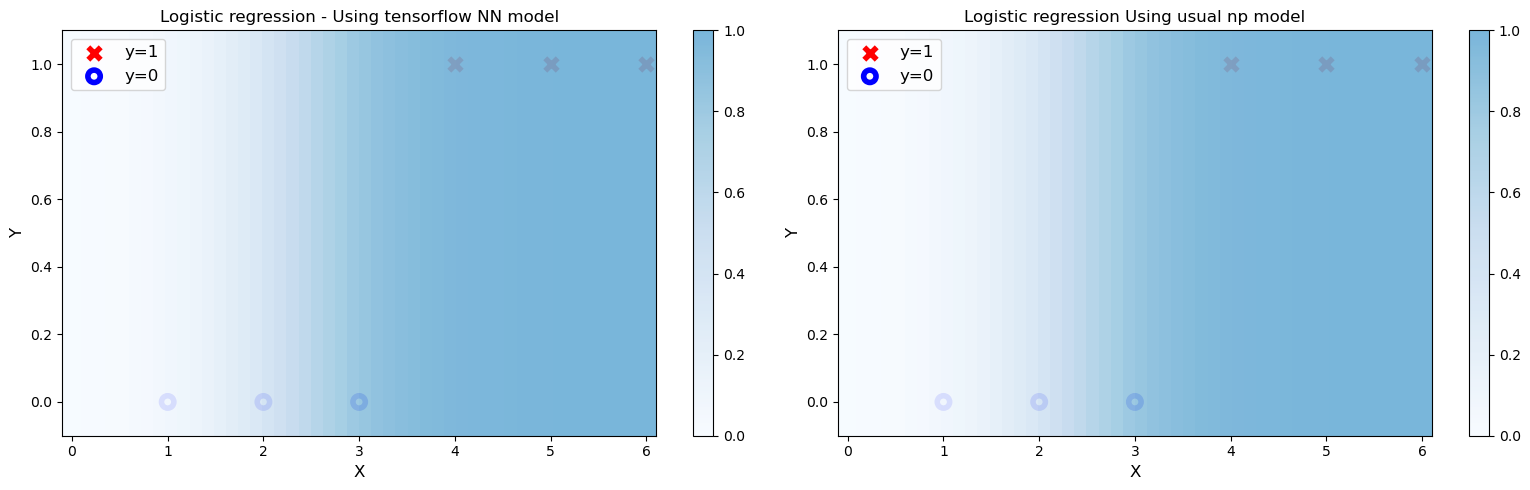

In [153]:
#plotting using color mesh
from matplotlib import colors as colors
from matplotlib import cm

def truncate_cmap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        "trunc({n}, {a:.2f}, {b:.2f})".format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

def plt_prob(f_wb, ax):
    """ plots a decision boundary but include shading to indicate the probability """
    #create the x and y spaces
    x_space = np.linspace(-0.1, 6.1, 50) #(50,)
    y_space = np.linspace(-0.1, 1.1, 50) #(50,)
    
    z = np.zeros((len(x_space), len(y_space)))
    
    #calculating z for each x any y spaces (imagine mesh grid coordinate space)
    for i in range(len(x_space)):
        x = np.array([[x_space[i]]])
        #note, we are only calculating y's for each given x using f.we dont bother about z's x's here
        z[:, i] = f_wb(x)
    
#     print(z.shape) #(50, 50)
    cmap = plt.get_cmap("Blues")
    new_cmap = truncate_cmap(cmap, minval=0.0, maxval=0.5)
    pcm = ax.pcolormesh(
        x_space, y_space, z,
        alpha=0.9, shading="nearest", cmap=new_cmap, 
        norm= cm.colors.Normalize(vmin=0, vmax=1)
    )
    ax.figure.colorbar(pcm, ax=ax)
    
def sigmoid(z):
    #clipping to make z between -500 to 500 to avoid overflow
    z = np.clip(z, -500 , 500)
    g = 1 / (1 + np.exp(-z))
    return g

def plt_logistic(X, y, model, set_w, set_b):
    fig, ax = plt.subplots(1, 2, figsize=(16, 5))
    pos = y==1
    neg = y==0
    ax[0].set_xlim(-0.1, 6.1)
    ax[0].set_ylim(-0.1, 1.1)
    ax[0].scatter(X[pos], y[pos], label="y=1", c="red", marker="x", lw=4, s=80)
    ax[0].scatter(X[neg], y[neg], label="y=0", marker="o", facecolors="none", edgecolors="blue", s=80, lw=4)
    f_tf = lambda x : model.predict(x) #tf model
    plt_prob(f_tf, ax[0])
    ax[0].legend(loc="best", fontsize=12)
    ax[0].set_xlabel("X", fontsize=12)
    ax[0].set_ylabel("Y", fontsize=12)
    ax[0].set_title("Logistic regression - Using tensorflow NN model")
    
    ax[1].set_xlim(-0.1, 6.1)
    ax[1].set_ylim(-0.1, 1.1)
    ax[1].scatter(X[pos], y[pos], label="y=1", c="red", marker="x", lw=4, s=80)
    ax[1].scatter(X[neg], y[neg], label="y=0", marker="o", facecolors="none", edgecolors="blue", s=80, lw=4)
    f_np = lambda x: sigmoid(np.dot(x.reshape(1, 1), set_w) + set_b) #np model
    plt_prob(f_np, ax[1])
    ax[1].legend(loc="best", fontsize=12)
    ax[1].set_xlabel("X", fontsize=12)
    ax[1].set_ylabel("Y", fontsize=12)
    ax[1].set_title("Logistic regression Using usual np model")
    plt.tight_layout()
    plt.show()
    
X = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], dtype=np.float32).reshape(-1, 1) #2D matrix
y = np.array([0.0, 0.0, 0.0, 1.0, 1.0, 1.0], dtype=np.float32).reshape(-1, 1)
set_w = np.array([[2]])
set_b = np.array([-4.5])
plt_logistic(X, y, model, set_w, set_b)

#The shading below reflects the output of the sigmoid which varies from 0 to 1.